<a href="https://colab.research.google.com/github/manojkhara/data-science-lab/blob/main/week-10/3%20Classical_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Data
It refers to data that is collected, recorded or observed over time in a sequential order.

Characteristics:
- Chronological Order : Observations are ordered in time (D, W, M, Y, s, m ,h)
- Sequential Dependency : The order of the data matters because previous values can influence or predict the future values.

- Temporal components : Trend, Seasonality, Cycle, noise


Time series Analysis:
- statistical technique : meaningful insights about pattern and trends
- forecasting



Time Series Decomposition
- Trend : long term direction
- Seasonality : repeting pattern at fixed interval
- Noise

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Using airline passenger dataset (monthly totals)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

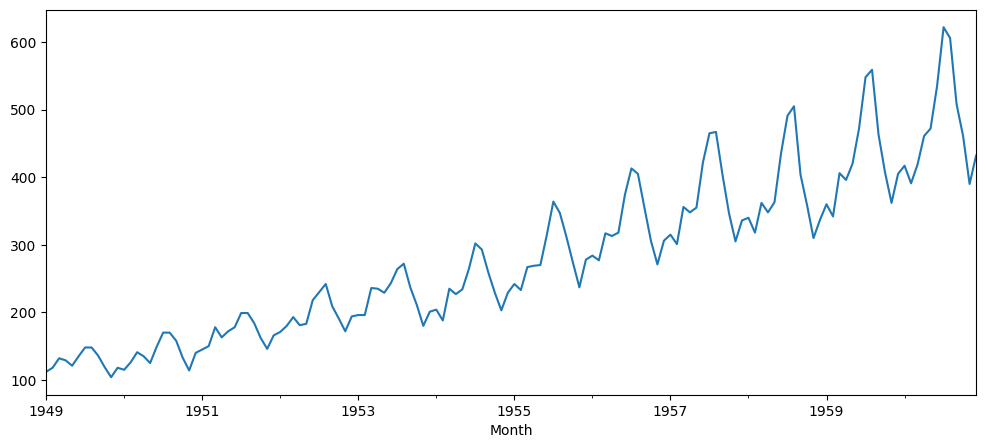

In [ ]:
df["Passengers"].plot(figsize = (12,5))

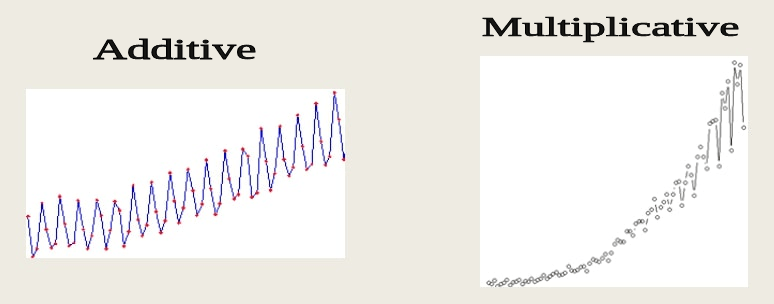


- Additive $ y_t = T_t + S_t + R_t$
- Multiplicative $ y_t = T_t * S_t * R_t$

In [ ]:
import yfinance as yf
ticker_symbol = 'RELIANCE.NS'
stock_data = yf.download(ticker_symbol, start='2023-01-01', end='2025-08-01', interval="1d")
stock_data.columns =stock_data.columns.droplevel("Ticker")
stock_data

/tmp/ipython-input-979513816.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start='2023-01-01', end='2025-08-01', interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2023-01-02,1180.586060,1182.006865,1167.890577,1168.715541,5316175
2023-01-03,1171.946655,1179.256896,1167.707271,1175.613232,7658932
2023-01-04,1154.301392,1173.780010,1152.216007,1171.923749,9264891
2023-01-05,1152.239014,1162.482516,1147.632911,1156.570169,13637099
2023-01-06,1162.711548,1167.776018,1154.186834,1158.013796,6349597
...,...,...,...,...,...
2025-07-25,1391.699951,1401.000000,1384.099976,1398.900024,11854722
2025-07-28,1387.599976,1407.800049,1385.000000,1392.300049,7748361
2025-07-29,1417.099976,1420.199951,1383.000000,1383.000000,10750072


In [ ]:
type(stock_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

<Axes: xlabel='Date'>

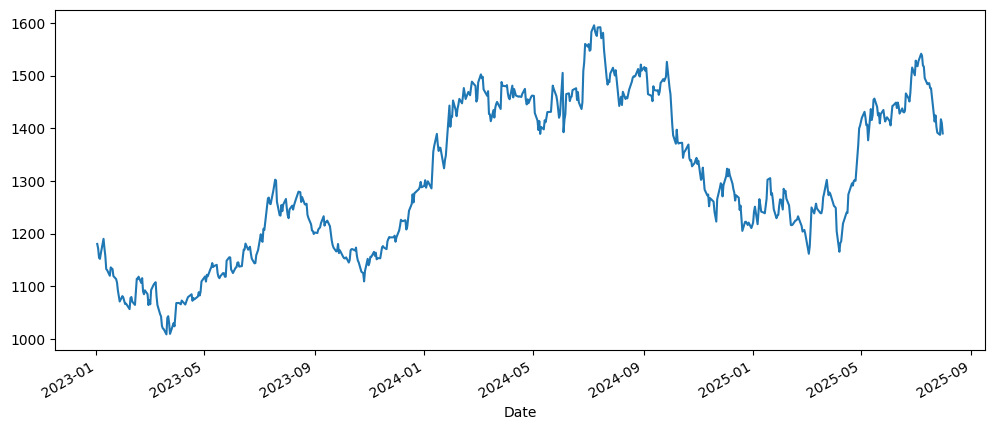

In [ ]:
stock_data["Close"].plot(figsize = (12,5))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(df["Passengers"], model="multiplicative", period = 10)

In [ ]:
trend = sd.trend
seasonal = sd.seasonal
residuals = sd.resid

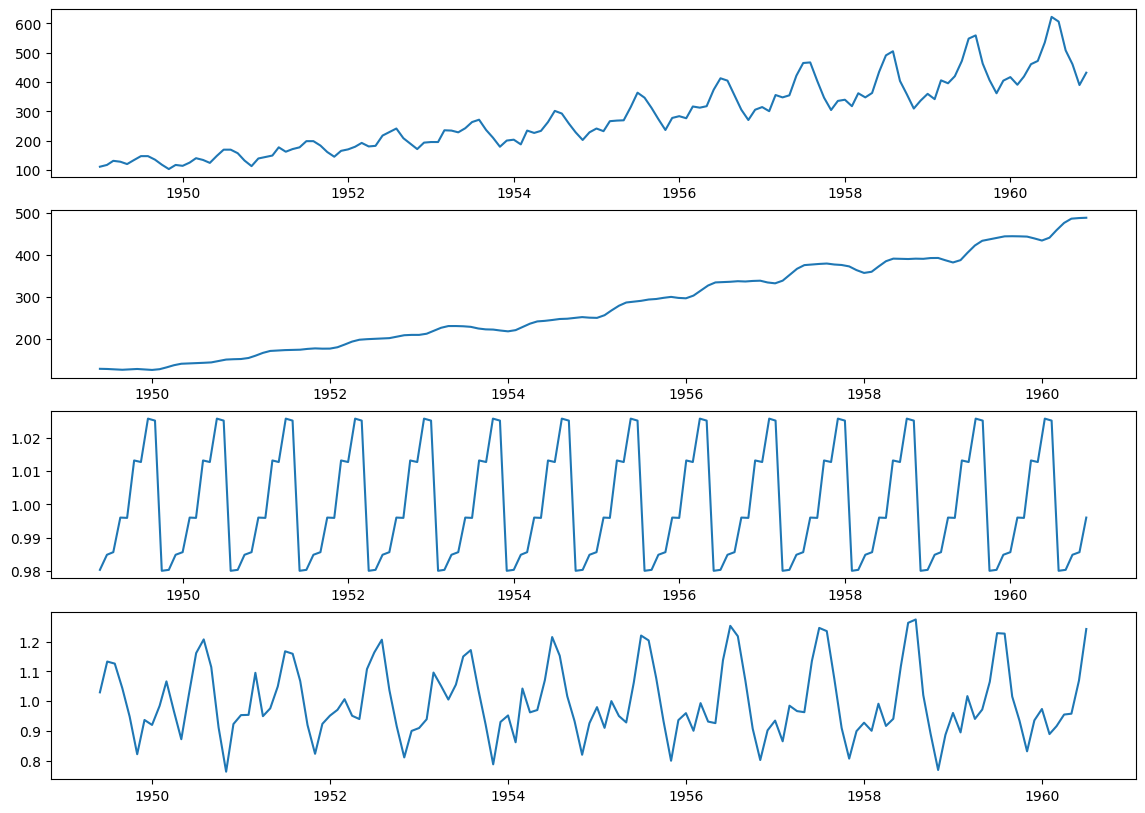

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df["Passengers"])
plt.subplot(412)
plt.plot(trend)
plt.subplot(413)
plt.plot(seasonal)
plt.subplot(414)
plt.plot(residuals)
plt.show()

In [ ]:
sd = seasonal_decompose(stock_data["Close"], model="additive", period = 10)

In [ ]:
trend = sd.trend
seasonal = sd.seasonal
residuals = sd.resid

In [ ]:
import matplotlib.pyplot as plt

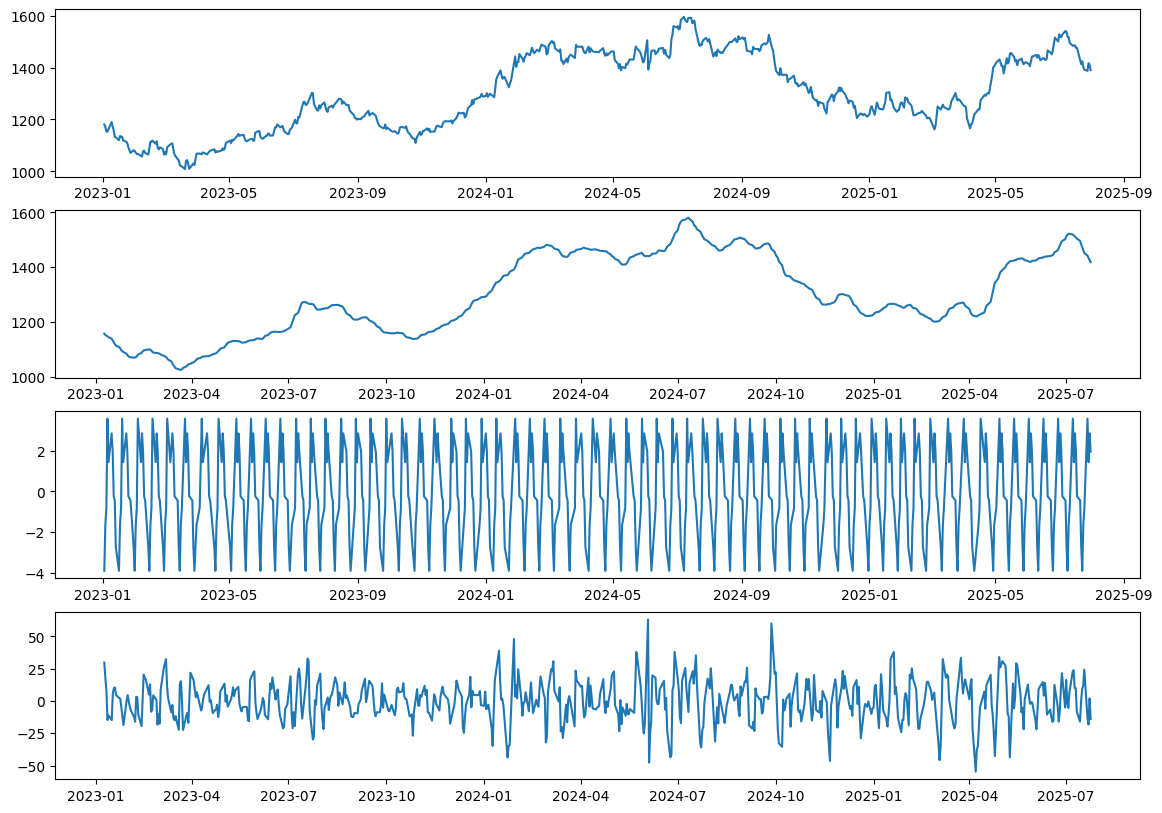

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data["Close"])
plt.subplot(412)
plt.plot(trend)
plt.subplot(413)
plt.plot(seasonal)
plt.subplot(414)
plt.plot(residuals)
plt.show()

- Assumes fixed seasonal patterns
- Easily influenced by the outliers
- Handle both additive and multiplicative models
- Preferred for multiplicative models

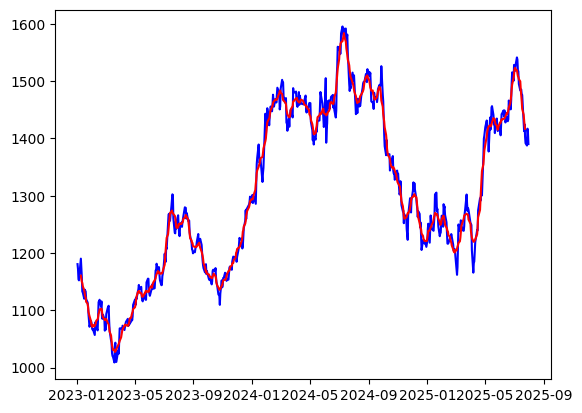

In [ ]:
import matplotlib.pyplot as plt

estimated = trend + seasonal
plt.plot(stock_data["Close"], color="blue")
plt.plot(estimated,  color="red")
plt.show()

In [ ]:
estimated.fillna(0)

,0
Date,
2023-01-02,0.0
2023-01-03,0.0
2023-01-04,0.0
2023-01-05,0.0
2023-01-06,0.0
...,...
2025-07-25,0.0
2025-07-28,0.0
2025-07-29,0.0


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(stock_data["Close"], estimated.fillna(0))

26253.988735045932